In [1]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s',force=True
)


import scipy.stats as stats

In [2]:
# Data Import using Pandas Function
url='https://raw.githubusercontent.com/anirudhajohare19/Heart_Disease_ML_Model/refs/heads/main/heart-disease.csv'

df=pd.read_csv(url,sep=',')

df.sample(frac= 1) # Shuffel Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [3]:
logging.info("Data set Uploaded succssfully")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Split the Dataset into Numerical_Data and Categorical_Data

Numerical_Data=df.select_dtypes(exclude='object')


In [6]:
# Checking Numerical_Data
Numerical_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


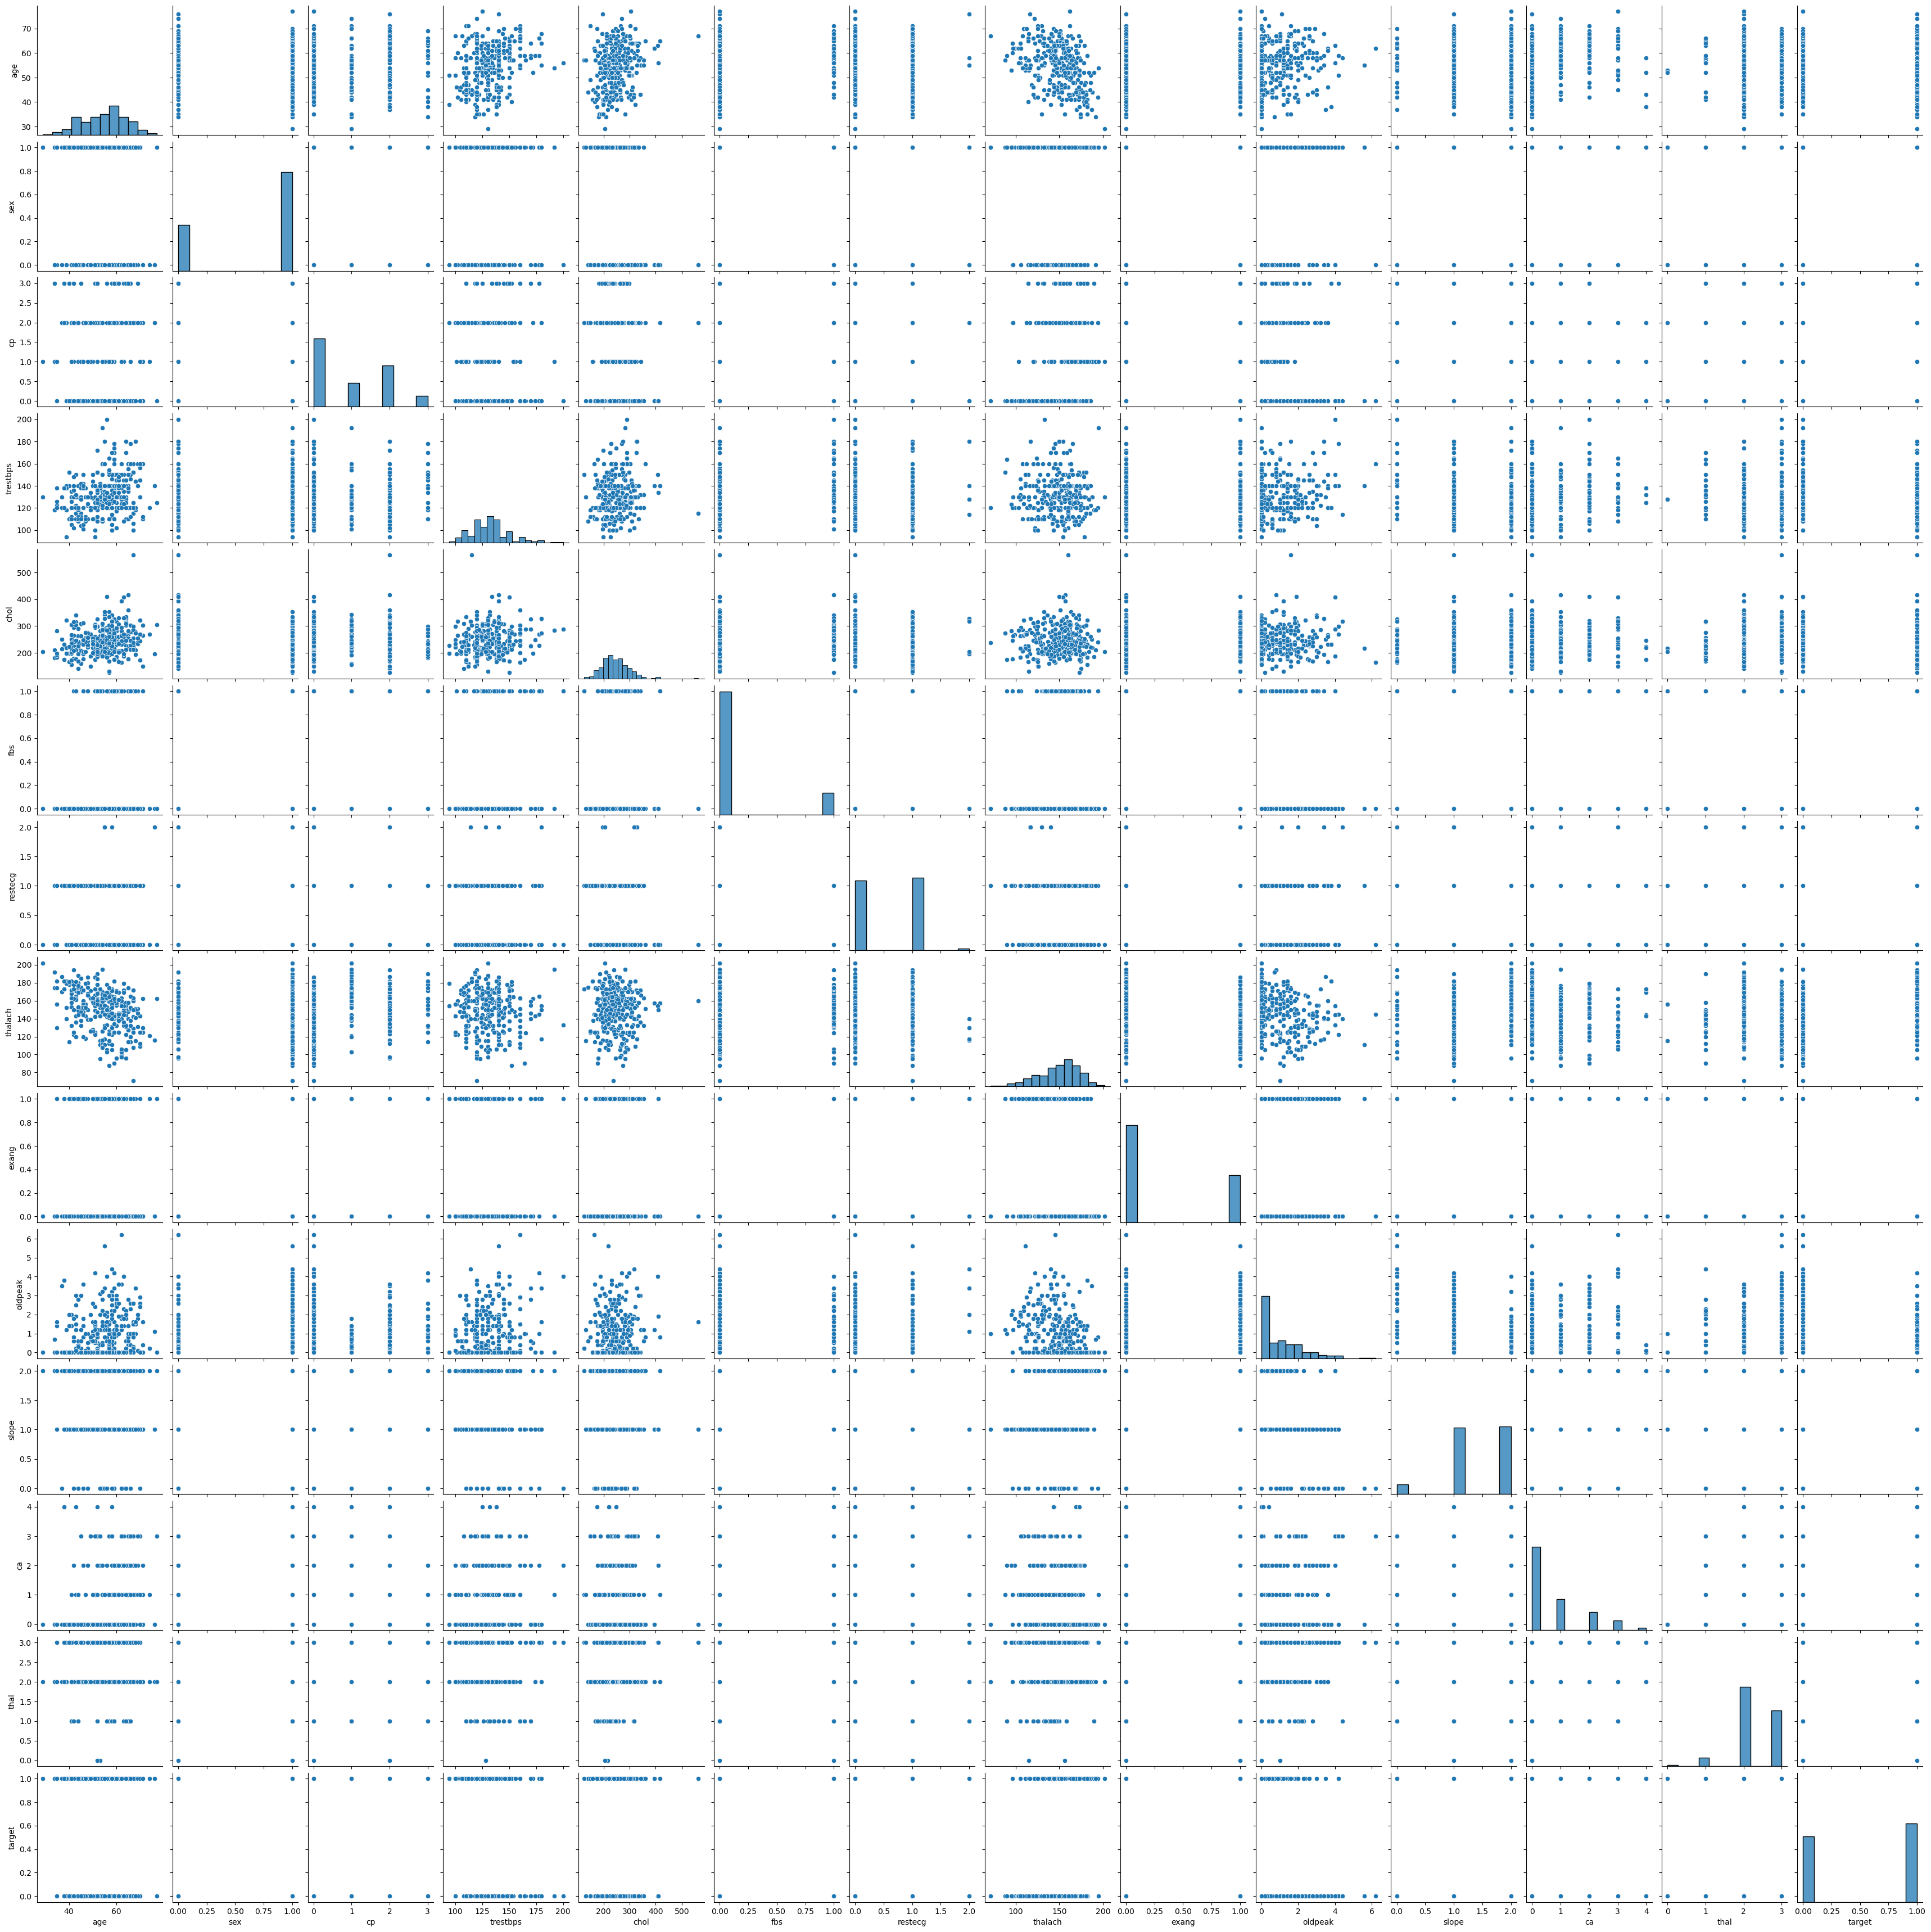

In [7]:
sns.pairplot(Numerical_Data)

In [8]:
logging.info("The Above dataset is non-Normal Distribution")

In [9]:
# Checking Missing Information If Any Using Graphical Method

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Information About The Dataset https://archive.ics.uci.edu/ml/datasets/heart+disease

sex - 1- male and 0 female

cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

ca: number of major vessels (0-3) colored by flourosopy

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

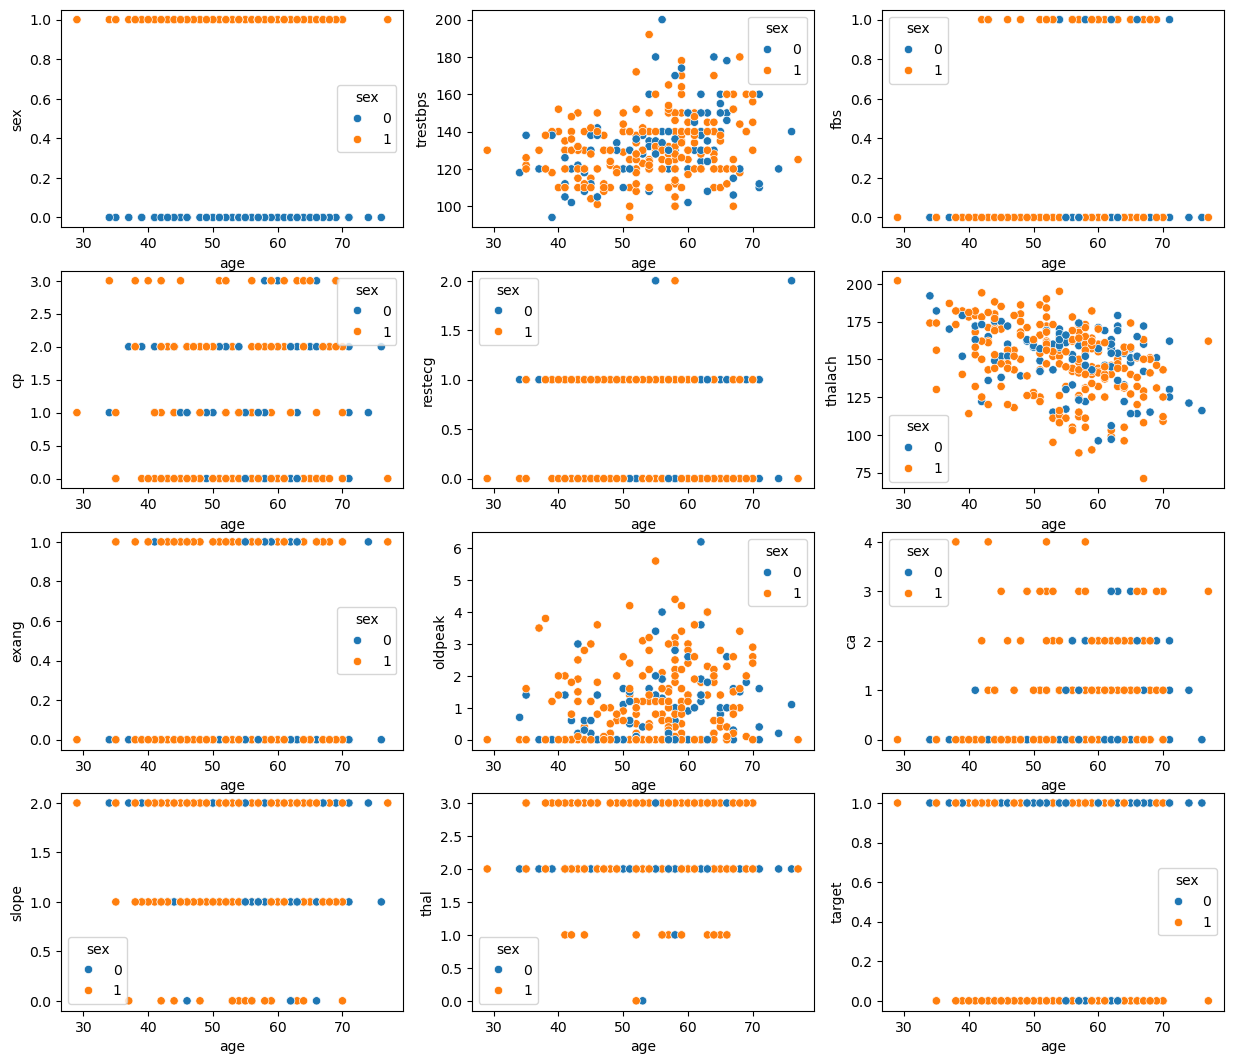

In [10]:
fig,ax = plt.subplots(4,3,figsize = (15,13),facecolor = 'white')
sns.scatterplot(ax = ax [0][0],x = df.age, y = df.sex, hue = df.sex)
sns.scatterplot(ax = ax [0][1],x = df.age, y = df.trestbps, hue = df.sex)
sns.scatterplot(ax = ax [0][2],x = df.age, y = df.fbs, hue = df.sex)
sns.scatterplot(ax = ax [1][0],x = df.age, y = df.cp, hue = df.sex)
sns.scatterplot(ax = ax [1][1],x = df.age, y = df.restecg, hue = df.sex)
sns.scatterplot(ax = ax [1][2],x = df.age, y = df.thalach, hue = df.sex)
sns.scatterplot(ax = ax [2][0],x = df.age, y = df.exang, hue = df.sex)
sns.scatterplot(ax = ax [2][1],x = df.age, y = df.oldpeak, hue = df.sex)
sns.scatterplot(ax = ax [2][2],x = df.age, y = df.ca, hue = df.sex)
sns.scatterplot(ax = ax [3][0],x = df.age, y = df.slope, hue = df.sex)
sns.scatterplot(ax = ax [3][1],x = df.age, y = df.thal, hue = df.sex)
sns.scatterplot(ax = ax [3][2],x = df.age, y = df.target, hue = df.sex)
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

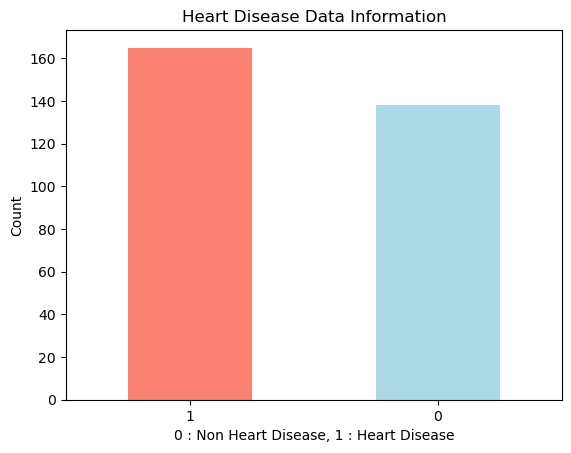

In [12]:
# Heart Disease Data Information
df.target.value_counts().plot(kind='bar', color = ['salmon','lightblue'])
plt.title('Heart Disease Data Information')
plt.xlabel('0 : Non Heart Disease, 1 : Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

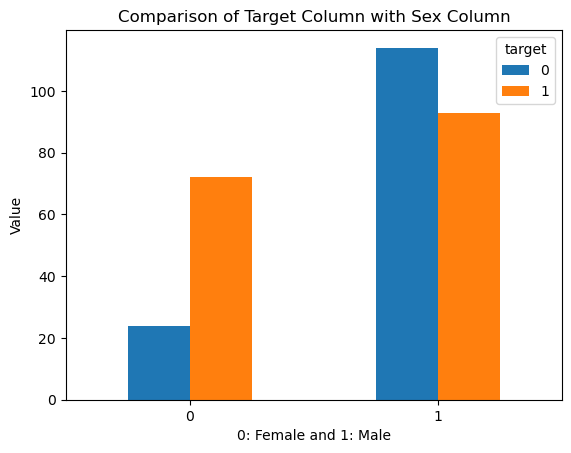

In [13]:
# Comparison of Target Column with Sex Column
pd.crosstab(df.sex,df.target).plot(kind = 'bar')
plt.title('Comparison of Target Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

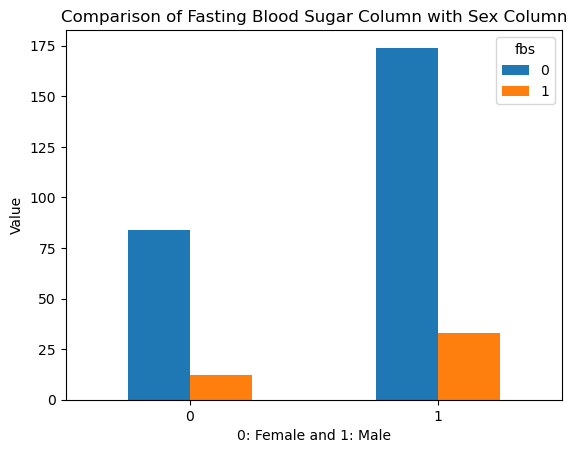

In [14]:
# Comparison of Fasting Blood Sugar Column with Sex Column
pd.crosstab(df.sex,df.fbs).plot(kind = 'bar')
plt.title('Comparison of Fasting Blood Sugar Column with Sex Column')
plt.xlabel('0: Female and 1: Male')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

# **Observations From The Above Dataset**
- Maximum People having 40+ Age
- The Dataset Contains 207 Males and 96 Females
- Out of 303 Dataset, 93 Males and 72 Females Found Heart Disease, whereas 114 Males and 24 Females not found Heart Disease.
- out of 303 Dataset, 33 Males and 12 Females having sugar level more than 120 mg/dl, where as 174 Males and 84 Females having sugar level less than 120 mg/dl
- Maximum i.e. 143 Patients having typical angina, 50 Patients with atypical angina, 87: Patients with non-anginal pain and 23 Patients asymptomatic
- Maximum Heart Rate is found between age group of 35 to 55.
- The Dataset Shows 165 as Heart Disease and Non Heart Disease Patients are 138.
- 75% Females and 44.92% Males found Heart Disease - Average : 59.96% Heart Disease Patients.

In [15]:
# Checking Description
from collections import OrderedDict

stats=[]
for i in Numerical_Data:

    numerical_stats=OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Mean':Numerical_Data[i].mean(),
        '25%':Numerical_Data[i].quantile(0.25),
        'Median':Numerical_Data[i].quantile(0.50),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew(),
        'Standard Deviation':Numerical_Data[i].std()


    })

    stats.append(numerical_stats)
    report=pd.DataFrame(stats)

report

,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,77.0,29.0,54.366337,47.5,55.0,61.0,-0.542167,-0.202463,9.082101
1,sex,1.0,0.0,0.683168,0.0,1.0,1.0,-1.382961,-0.791335,0.466011
2,cp,3.0,0.0,0.966997,0.0,1.0,2.0,-1.193071,0.484732,1.032052
3,trestbps,200.0,94.0,131.623762,120.0,130.0,140.0,0.929054,0.713768,17.538143
4,chol,564.0,126.0,246.264026,211.0,240.0,274.5,4.505423,1.143401,51.830751
5,fbs,1.0,0.0,0.148515,0.0,0.0,0.0,1.959678,1.986652,0.356198
6,restecg,2.0,0.0,0.528053,0.0,1.0,1.0,-1.362673,0.162522,0.525860
7,thalach,202.0,71.0,149.646865,133.5,153.0,166.0,-0.061970,-0.537410,22.905161
8,exang,1.0,0.0,0.326733,0.0,0.0,1.0,-1.458317,0.742532,0.469794
9,oldpeak,6.2,0.0,1.039604,0.0,0.8,1.6,1.575813,1.269720,1.161075


[]

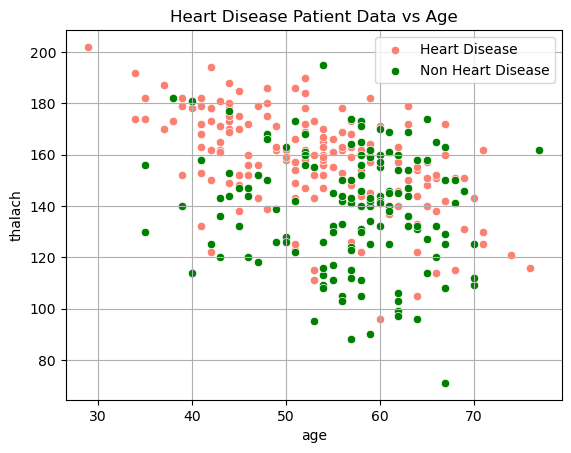

In [16]:
# Data Visualization for Heart Disease Patient Data vs Age
sns.scatterplot(x = df.age[df.target==1], y = df.thalach[df.target==1],color='salmon')
sns.scatterplot(x = df.age[df.target==0], y = df.thalach[df.target==0],color='green')
plt.title('Heart Disease Patient Data vs Age')
plt.legend(['Heart Disease','Non Heart Disease'])
plt.grid()
plt.plot()

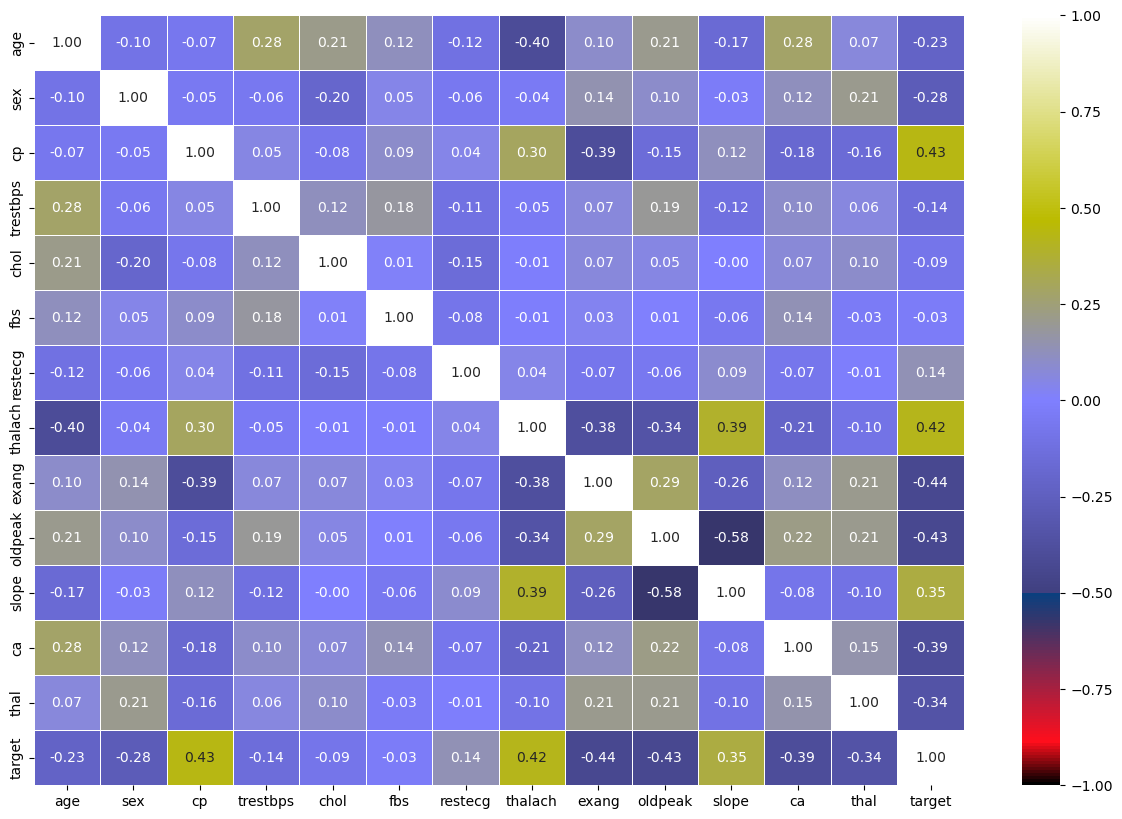

In [17]:
# Correlation Between Variables
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='gist_stern',center=0,vmax=1,vmin=-1,linewidths=0.5,fmt='0.2f')
plt.show()

In [18]:
#Checking Output i.e Target Column for Data Distribution

df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Data Split into X and y

In [19]:
X = df.drop(columns='target')

y = df['target']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7 )

In [21]:

# scaling the Model Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Step 4: Using SMOTE Technique to Balance Target Column
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [23]:
# Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression

# Implement Logistics regression to our Binary Classification Model
LR = LogisticRegression()

# Fit The Model on Training Dataset
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6 : Use Matrix to Evaluate Model Performance
from sklearn.metrics import accuracy_score , classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)

print(f'Logistic Regression Accuracy Score : {(accuracy_score_LR)*100:.2f} %')

Logistic Regression Accuracy Score : 78.02 %


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        45
           1       0.74      0.87      0.80        46

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[31, 14],
       [ 6, 40]])

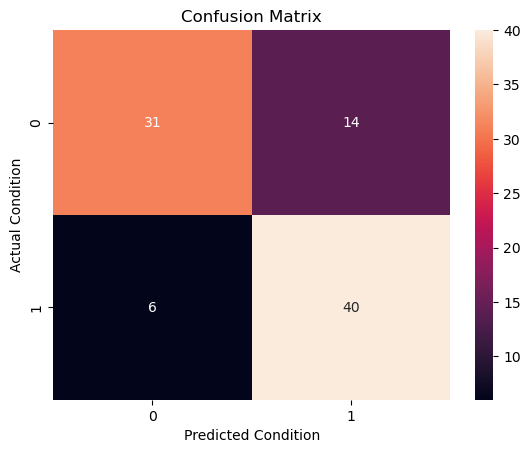

In [26]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot= True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

# **Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_predict_RF = RF.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF

print(f'Random Forest Classifier Accuracy Score : {(accuracy_score_RF)*100:.2f} %')

Random Forest Classifier Accuracy Score : 76.92 %


In [28]:
# Classification Report for Random Forest Model
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        45
           1       0.74      0.85      0.79        46

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict_RF)

array([[31, 14],
       [ 7, 39]])

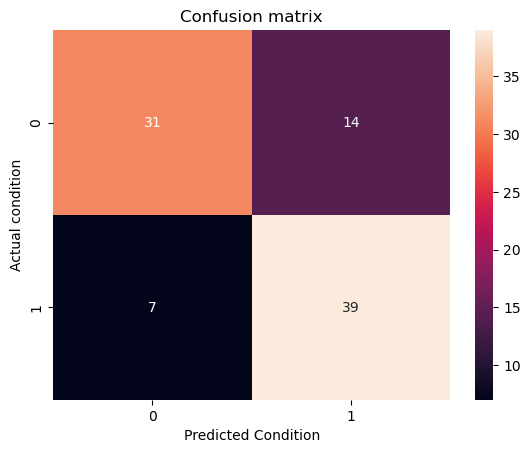

In [30]:
# Confusion Matrix for Random Forest Classification Model

sns.heatmap(confusion_matrix(y_test,y_predict_RF),annot = True)
plt.title('Confusion matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual condition')
plt.show()